In [12]:
import os
import numpy as np
import nibabel as nib
from nibabel.affines import rescale_affine
from nilearn.image import resample_img
import matplotlib.pyplot as plt

In [13]:
ROOTDIR = "/homes/l17vedre/Bureau/Sanssauvegarde/patnum_data/train"
SAMPLE_INDEX = 0

In [14]:
image_list        = sorted(filter(lambda x: 'src'  in x, os.listdir(ROOTDIR)))
mask_list         = sorted(filter(lambda x: 'mask' in x, os.listdir(ROOTDIR)))
target_resolution = (1.5, 1.5, 8)
target_shape      = np.array(None)

In [15]:
def resample(image, target_resolution, target_shape):
    if not target_shape:
        target_shape = image.shape
    target_affine = rescale_affine(image.affine, image.shape, target_resolution, new_shape=target_shape)
    return resample_img(image, target_affine=target_affine, target_shape=target_shape, interpolation='nearest')

In [16]:
def load(rootdir, image_list, mask_list, index, target_resolution, target_shape):
    image = nib.load(os.path.join(rootdir, image_list[index]))
    mask  = nib.load(os.path.join(rootdir,  mask_list[index]))
    image, mask = resample(image, target_resolution, target_shape), resample(mask, target_resolution, target_shape)
    image_array, mask_array = image.get_fdata(), mask.get_fdata()
    return image_array, mask_array

In [25]:
image, mask = load(ROOTDIR, image_list, mask_list, SAMPLE_INDEX, target_resolution, target_shape)
assert image.shape == mask.shape
w, h, d = image.shape

In [26]:
def compare_2_images(image1, image2, title1='', title2='', cmap1='gray', cmap2= 'gray', colorbar=False):
        fig, axes = plt.subplots(1, 2, figsize=(15, 10))
        ax = axes.ravel()
        ax[0].set_title(title1)
        plot1 = ax[0].imshow(image1, cmap=cmap1)
        ax[1].set_title(title2)
        plot2 = ax[1].imshow(image2, cmap=cmap2)
        if colorbar:
            fig.colorbar(plot1, ax=ax[0], shrink=0.55)
            fig.colorbar(plot2, ax=ax[1], shrink=0.55)
        plt.show()

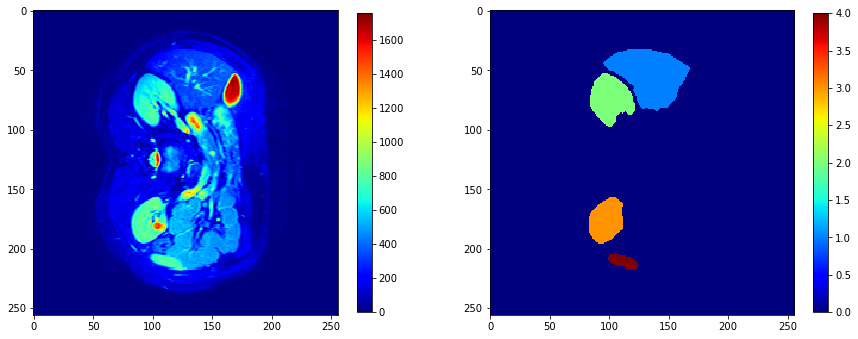

In [27]:
compare_2_images(image[:,:,d//2], mask[:,:,d//2], cmap1='jet', cmap2='jet', colorbar=True)

In [29]:
def select_classes(mask, class_indexes):
    all_classes = [1,2,3,4]
    classes_to_delete = list(filter(lambda x: x not in class_indexes, all_classes))
    for class_index in classes_to_delete:
        mask[mask== class_index] = 0

In [30]:
select_classes(mask, [1, 3])

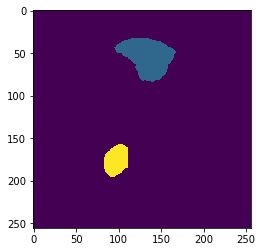

In [31]:
plt.imshow(mask[:,:,d//2])